In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests

In [2]:
#df = pd.read_csv('laptops.csv', encoding = "ISO-8859-1")
url = 'https://raw.githubusercontent.com/aibhishek/IFBD/master/laptops.csv'
s=requests.get(url).content
df=pd.read_csv(url, encoding = "ISO-8859-1", error_bad_lines=False)

In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

#### Splitting CPU

In [9]:
df.Cpu = df.Cpu.replace({'Intel Atom x5-Z8350 1.44GHz': 'Intel Atom x5-Z8350 1.4GHz', 'Intel Celeron Dual Core N3060 1.60GHz': 'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Atom Z8350 1.92GHz': 'Intel Atom Z8350 1.9GHz', 'Intel Core i5 7200U 2.50GHz': 'Intel Core i5 7200U 2.5GHz','Intel Core i5 7200U 2.70GHz':'Intel Core i5 7200U 2.7GHz','Intel Atom X5-Z8350 1.44GHz': 'Intel Atom X5-Z8350 1.4GHz', 'Intel Core i5 7200U 2.50GHz': 'Intel Core i5 7200U 2.5GHz','Intel Atom x5-Z8300 1.44GHz':'Intel Atom x5-Z8300 1.4GHz','Intel Core i7 6500U 2.50GHz':'Intel Core i7 6500U 2.5GHz'})

In [10]:
df['CPU Frequency'] = df.Cpu.str[-6:]
df['CPU Frequency'] = df['CPU Frequency'].str[0:3]
df['CPU Frequency'] = df['CPU Frequency'].replace({'U 2':'2.0','6 3':'3.0','0 3':'3.0','P 3':'3.0','0 2':'2.0'})
df['CPU Frequency'] = pd.to_numeric(df['CPU Frequency'], errors='coerce')

In [11]:
df['CPU Frequency'].unique()

array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.4 , 1.5 , 1.9 , 1.1 , 0.44, 1.3 , 2.6 , 3.6 , 3.2 ,
       1.  , 2.1 , 0.9 ])

In [12]:
df.Cpu = df.Cpu.str[0:13]

In [14]:
df.Cpu = df.Cpu.replace({'AMD A10-Serie':'AMD A10-Series','AMD A12-Serie':'AMD A12-Series','Samsung Corte':'Samsung Cortex'})

In [48]:
#df

In [37]:
df["Memory Capacity in GB"].unique()

array([ 128,  256,  512,  500, 1000,   32, 1128,   64, 1256, 2256, 2000,
       1512,  756, 2128,   16, 2512, 1064,  180,  240,    8,  508],
      dtype=int64)

#### Converting Memory to numeric

In [24]:
df.Memory = df.Memory.replace({'128GB SSD +  2TB HDD':'2128GB Hybrid',
                               '256GB SSD +  256GB SSD':'500GB SSD',
                               '256GB SSD +  2TB HDD':'2256GB Hybrid',
                              '512GB SSD +  1TB HDD':'1512GB Hybrid',
                              '256GB SSD +  500GB HDD':'756GB Hybrid',
                              '128GB SSD +  2TB HDD':'2128GB Hybrid',
                              '512GB SSD +  512GB SSD':'1TB SSD',
                              '512GB SSD +  256GB SSD':'756GB SSD',
                              '512GB SSD +  2TB HDD':'2512GB Hybrid',
                              '64GB Flash Storage +  1TB HDD':'1064GB Hybrid',
                              '1TB HDD +  1TB HDD':'2000GB HDD',
                              '512GB SSD +  1.0TB Hybrid':'1512GB Hybrid',
                              '256GB SSD +  1.0TB Hybrid':'1256GB Hybrid',
                              '128GB SSD +  1TB HDD':'1128GB Hybrid',
                              '256GB SSD +  1TB HDD':'1256GB Hybrid',
                              '1TB SSD +  1TB HDD':'2000GB Hybrid'
                              
                              })

In [26]:
df.Memory = df.Memory.replace({'1TB HDD':'1000GB HDD','2TB HDD':'2000GB HDD','1.0TB Hybrid':'1000GB Hybrid','1TB SSD':'1000GB SSD','1.0TB HDD':'1000GB HDD'})

In [29]:
new = df.Memory.str.split(" ", n = 1, expand = True) 
df["Memory Capacity in GB"]= new[0]
df["Memory Type"]= new[1] 

In [31]:
# Dropping Memory column
df = df.drop('Memory',axis=1)
new = df["Memory Capacity in GB"].str.split("G", n = 1, expand = True) 
df["Memory Capacity in GB"]= new[0]
df["Memory Capacity in GB"] = pd.to_numeric(df["Memory Capacity in GB"])

In [43]:
df["RAM (GB)"].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

#### Convertinh RAM to numeric

In [40]:
new = df["Ram"].str.split("G", n = 1, expand = True) 
df["RAM (GB)"]= new[0]
df["RAM (GB)"] = pd.to_numeric(df["RAM (GB)"])
df["RAM (GB)"] = pd.to_numeric(df["RAM (GB)"])
df = df.drop('Ram', axis=1)

### <p style = "color:red">Visualisations</p>

### Matplotlib

In [16]:
import matplotlib.pyplot as plt

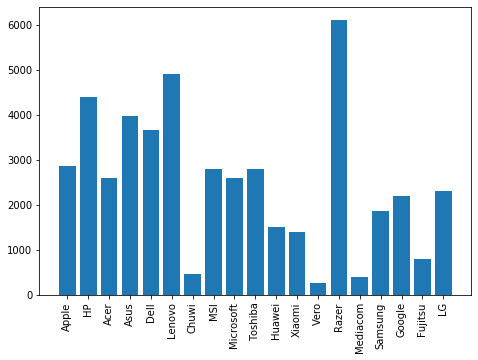

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Company,df.Price_euros)
plt.xticks(rotation=90)
plt.show()